In [1]:
from utils import *
import matplotlib.pyplot as plt
from CaptureUtils import CaptureUtils

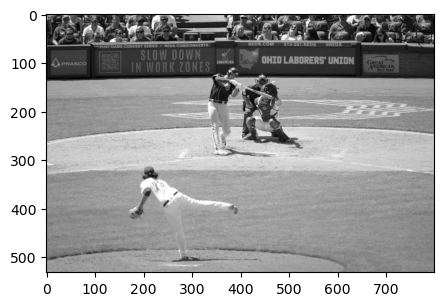

In [2]:
img = readImage('./input/base.png')
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
showImage(img_gray, cmap='gray')

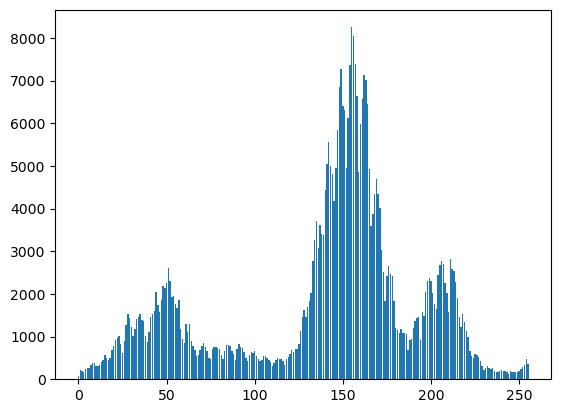

In [3]:
hist = cv.calcHist([img_gray], [0], None, [256], [0, 256])
plt.figure()
plt.bar([i for i in range(len(hist))], hist.ravel())
plt.show()

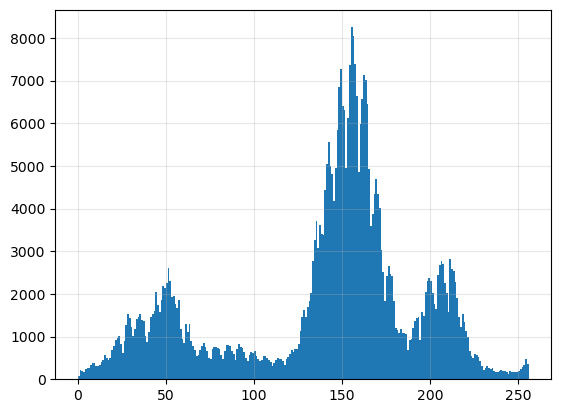

In [4]:
plt.figure()
plt.hist(img_gray.ravel(), 256, [0, 256], density=False)
plt.grid(True, linestyle='-', alpha=0.3)
plt.show()

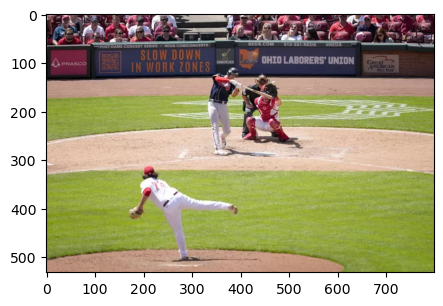

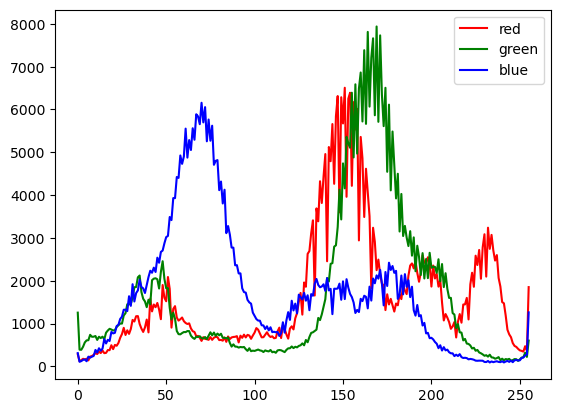

In [5]:
color = ['red', 'green', 'blue']
showImage(img)
plt.figure()
for i, c in enumerate(color):
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=c[0], label=c)
plt.legend()
plt.show()

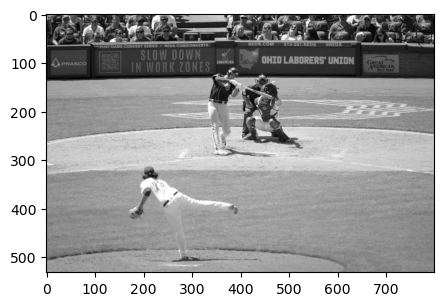

In [6]:
showImage(img_gray, cmap='gray')

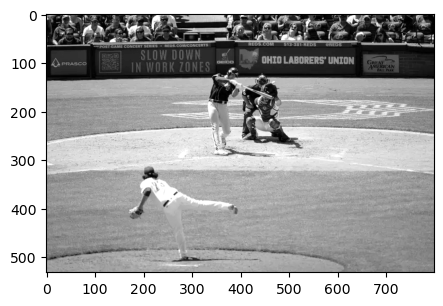

In [7]:
img_gray_l = cv.convertScaleAbs(img_gray, None, 1.2, -0.1*255)
showImage(img_gray_l, cmap='gray')

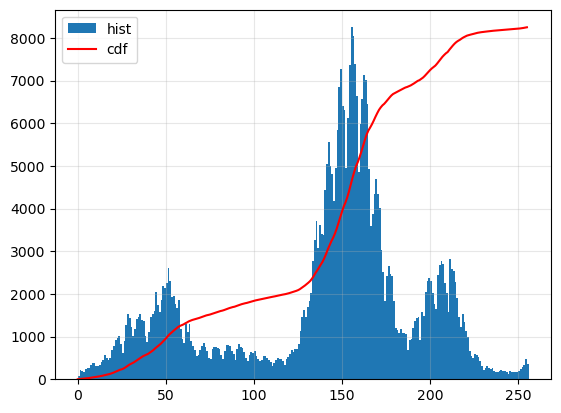

In [8]:
plt.figure()
plt.hist(img_gray.ravel(), 256, [0, 256], density=False, label='hist')
hist = cv.calcHist([img_gray], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='r', label='cdf')
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend()
plt.show()

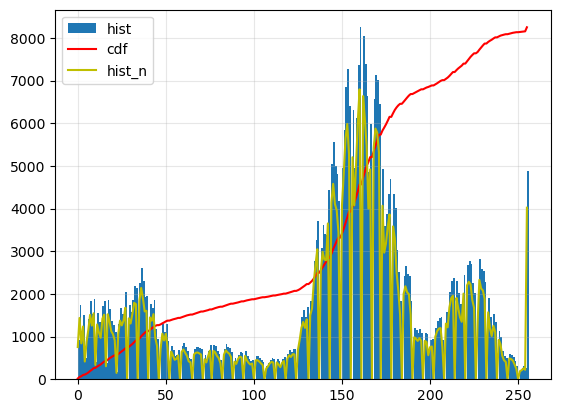

In [9]:
plt.figure()
plt.hist(img_gray_l.ravel(), 256, [0, 256], density=False, label='hist')
hist = cv.calcHist([img_gray_l], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='r', label='cdf')
hist_n = cv.normalize(hist,0,255,cv.NORM_MINMAX)
plt.plot(hist_n.ravel()*127, color='y', label='hist_n')
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend()
plt.show()

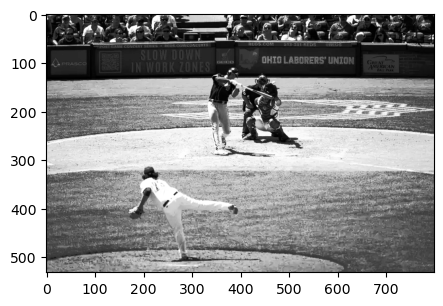

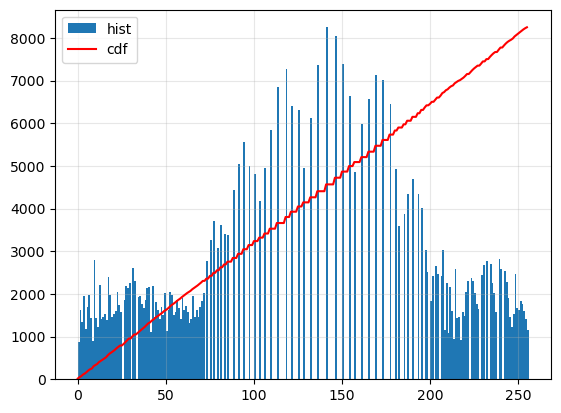

In [10]:
img_gray_l = cv.equalizeHist(img_gray)
showImage(img_gray_l, cmap='gray')
plt.figure()
plt.hist(img_gray_l.ravel(), 256, [0, 256], density=False, label='hist')
hist = cv.calcHist([img_gray_l], [0], None, [256], [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color='r', label='cdf')
plt.grid(True, linestyle='-', alpha=0.3)
plt.legend()
plt.show()

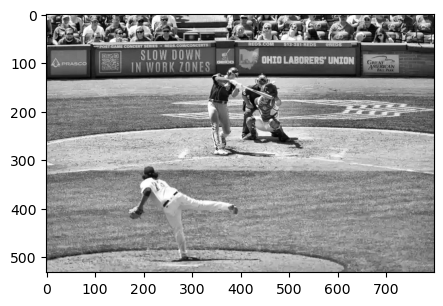

In [11]:
clahe = cv.createCLAHE(clipLimit=2, tileGridSize=(8, 8))
img_gray_l = clahe.apply(img_gray)
showImage(img_gray_l, cmap='gray')

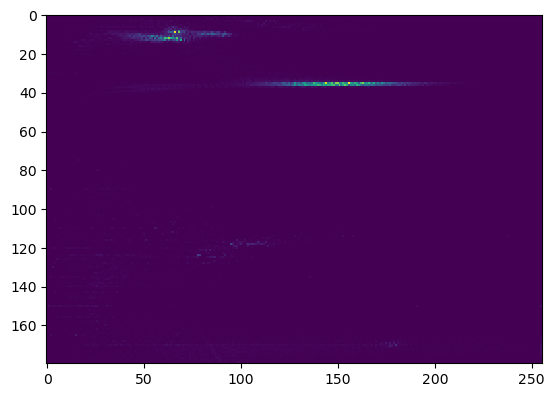

In [12]:
hsv = cv.cvtColor(img,cv.COLOR_RGB2HSV)
hist = cv.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()

In [13]:
capture = CaptureUtils(cv.cvtColor(img, cv.COLOR_RGB2BGR), 1, color=(0, 255, 255))
coll = capture.startCapture('q')
coll

[((11, 78), (82, 121))]

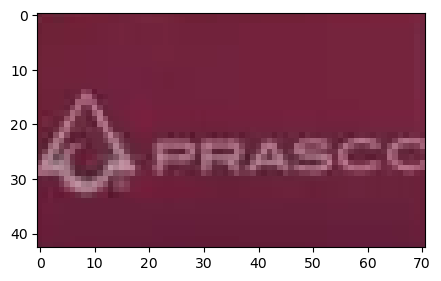

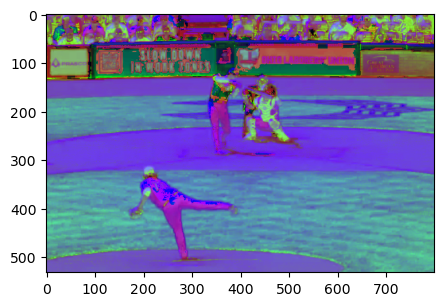

In [14]:
roi = img[coll[0][0][1]:coll[0][1][1], coll[0][0][0]:coll[0][1][0]]
target = img.copy()
hsv = cv.cvtColor(roi,cv.COLOR_BGR2HSV)
hsvt = cv.cvtColor(target,cv.COLOR_BGR2HSV)
showImage(roi)
showImage(hsvt)


In [15]:
# 计算对象的直方图
roihist = cv.calcHist([hsv],[0, 1], None, [180, 256], [0, 180, 0, 256] )


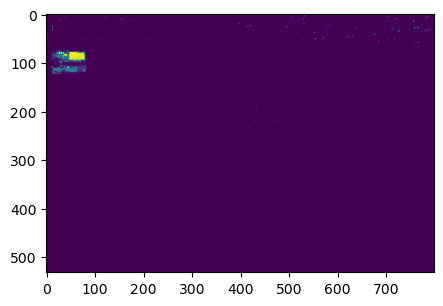

In [16]:
# 直方图归一化并利用反传算法
cv.normalize(roihist,roihist,0,255,cv.NORM_MINMAX)
dst = cv.calcBackProject([hsvt],[0,1],roihist,[0,180,0,256],1)
showImage(dst)

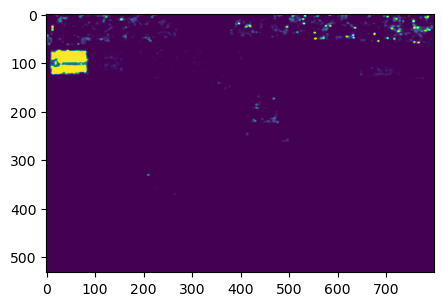

In [17]:
# 用圆盘进行卷积
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
cv.filter2D(dst,-1,disc,dst)
showImage(dst)

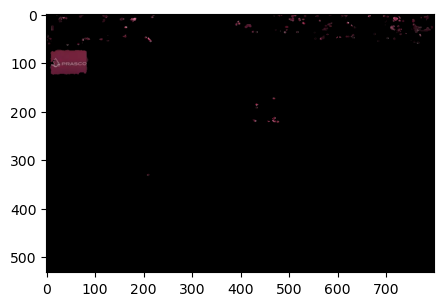

In [18]:
# 应用阈值作与操作
ret,thresh = cv.threshold(dst,50,255,0)
thresh = cv.merge((thresh,thresh,thresh))
res = cv.bitwise_and(img,thresh)
# dest = cv.cvtColor(res, cv.COLOR_HSV2RGB)
# res = np.vstack((hvs,thresh,res))
showImage(res)